In [27]:
import torch
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
timestep = 0
NBOX = 39 * 159 * 169

In [3]:
featloc = "/home/kphadke/hackathon/norm_data_timesteps_feat"
targloc = "/home/kphadke/hackathon/norm_data_timesteps_targ"

featcols = np.load(f"{featloc}/x_name.npy")
targcols = np.load(f"{targloc}/y_name.npy")


feats = np.load(f"{featloc}/{timestep}feat_norm.npy")
targs = np.load(f"{targloc}/{timestep}targ_norm.npy")

In [ ]:
# dd = np.load("norm_data/t0_feat.npy")

In [15]:

X = feats.reshape(103, -1).transpose()

X.shape

(1047969, 103)

(array([ 84778.,  82936.,  69976.,  77285.,  81761.,  85191.,  91110.,
         98939., 134932., 241061.]),
 array([-1.92097366, -1.59766762, -1.27436159, -0.95105555, -0.62774951,
        -0.30444348,  0.01886256,  0.34216859,  0.66547463,  0.98878067,
         1.3120867 ]),
 <BarContainer object of 10 artists>)

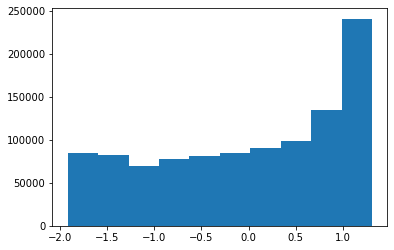

In [14]:
plt.hist(X[:,-3])

In [6]:
X[:,0].std()

NameError: name 'X' is not defined

In [5]:
exclude_cols = ["XLONG", "XLAT"]
target_cols  = ["ccn_001", "ccn_003", "ccn_006"]

target_idx = [np.where(targcols == i)[0].item() for i in target_cols ]
feat_idx   = [np.where(featcols == i)[0].item() for i in featcols if i not in exclude_cols]

In [6]:
featcols[feat_idx], targcols[target_idx]

(array(['TOT_NUM_CONC', 'TOT_MASS_CONC', 'pmc_SO4', 'pmc_NO3', 'pmc_Cl',
        'pmc_NH4', 'pmc_ARO1', 'pmc_ARO2', 'pmc_ALK1', 'pmc_OLE1',
        'pmc_API1', 'pmc_API2', 'pmc_LIM1', 'pmc_LIM2', 'pmc_OC', 'pmc_BC',
        'pmc_H2O', 'TEMPERATURE', 'REL_HUMID', 'ALT', 'Z', 'h2so4', 'hno3',
        'hcl', 'nh3', 'no', 'no2', 'no3', 'n2o5', 'hono', 'hno4', 'o3',
        'o1d', 'O3P', 'oh', 'ho2', 'h2o2', 'co', 'so2', 'ch4', 'c2h6',
        'ch3o2', 'ethp', 'hcho', 'ch3oh', 'ANOL', 'ch3ooh', 'ETHOOH',
        'ald2', 'hcooh', 'RCOOH', 'c2o3', 'pan', 'aro1', 'aro2', 'alk1',
        'ole1', 'api1', 'api2', 'lim1', 'lim2', 'par', 'AONE', 'mgly',
        'eth', 'OLET', 'OLEI', 'tol', 'xyl', 'cres', 'to2', 'cro', 'open',
        'onit', 'rooh', 'ro2', 'ano2', 'nap', 'xo2', 'xpar', 'isop',
        'isoprd', 'isopp', 'isopn', 'isopo2', 'api', 'lim', 'dms', 'msa',
        'dmso', 'dmso2', 'ch3so2h', 'ch3sch2oo', 'ch3so2', 'ch3so3',
        'ch3so2oo', 'ch3so2ch2oo', 'SULFHOX', 'P', 'PB', 'cos(Ti

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(52)
full_indx = np.arange(133)
train_idx, val_idx = train_test_split(full_indx, test_size=0.2, train_size=0.8) 

In [29]:
# my data
featloc = "norm_data"
targloc = "norm_data"

train_feat_files = [f"{featloc}/t{t}_feat.npy" for t in train_idx]
val_feat_files   = [f"{featloc}/{t}_feat.npy" for t in val_idx  ]

train_targ_files = [f"{targloc}/t{t}_targ.npy" for t in train_idx]
val_targ_files   = [f"{targloc}/t{t}_targ.npy" for t in val_idx]

In [9]:
# # kedar data
# train_feat_files = [f"{featloc}/{t}feat_norm.npy" for t in train_idx]
# val_feat_files   = [f"{featloc}/{t}feat_norm.npy" for t in val_idx  ]

# train_targ_files = [f"{targloc}/{t}targ_norm.npy" for t in train_idx]
# val_targ_files   = [f"{targloc}/{t}targ_norm.npy" for t in val_idx]

In [30]:
def prepare_dataloaders(feat_files, targ_files, box_fraction=0.1):
    NBOX = 39 * 159 * 169
    
    num_samples_per_box = int(NBOX * box_fraction)
    
    d = []
    t = []
    for f_fn, t_fn in zip(feat_files, targ_files):
        # select a fraction of data randomly
        sidx = np.random.randint(0, NBOX, num_samples_per_box)
        feats = np.load(f_fn)
        targs = np.load(t_fn)
        
        # keep the subset
        d.append(feats[sidx])
        t.append(targs[sidx])
    return np.vstack(d), np.vstack(t)

In [31]:
# %%time
train_feat, train_targ = prepare_dataloaders(train_feat_files[:10], train_targ_files[:10], box_fraction=0.1)

In [32]:
train_feat

array([[-0.93392634, -1.225394  , -1.3806053 , ..., -1.293118  ,
        -1.2949362 ,  0.6087614 ],
       [-0.00332903, -0.32949027, -0.22502257, ..., -0.797157  ,
        -0.7980082 ,  0.6087614 ],
       [-1.051588  , -1.1986759 , -1.2585828 , ..., -1.1752251 ,
        -1.1782928 ,  0.6087614 ],
       ...,
       [-0.5920902 , -0.7402264 , -0.8104994 , ..., -1.0778035 ,
        -1.0762073 ,  0.04361939],
       [ 2.5839014 ,  2.736919  ,  2.2091472 , ...,  1.284178  ,
         1.2849052 ,  0.04361939],
       [-0.25849175, -0.8768805 , -1.0030199 , ..., -0.98978007,
        -0.99019843,  0.04361939]], dtype=float32)

In [33]:
train_targ.shape

(1047960, 11)

In [34]:
from Models.MLP import SimpleMLP

In [35]:
tds = torch.utils.data.TensorDataset(
    torch.from_numpy(train_feat), 
    torch.from_numpy(train_targ)
)
dl_train =torch.utils.data.DataLoader(tds, batch_size=1024, shuffle=True)

In [36]:
X, y = next(iter(dl_train))

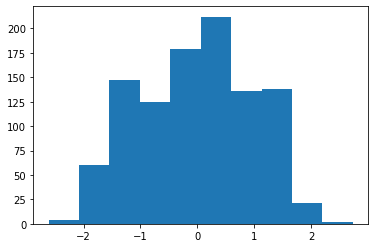

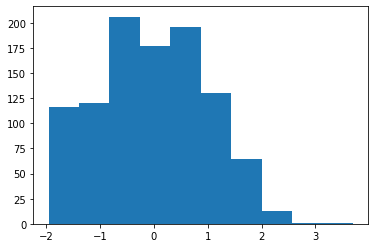

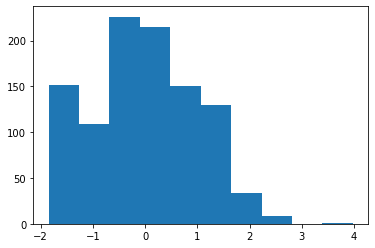

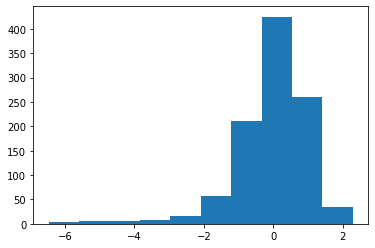

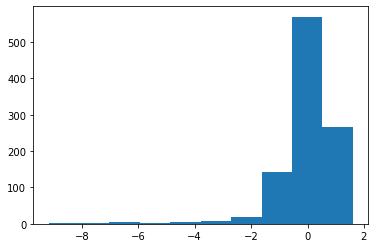

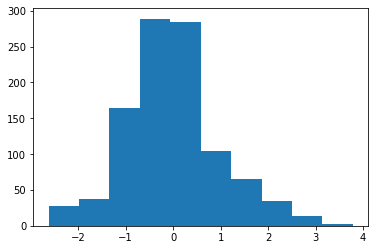

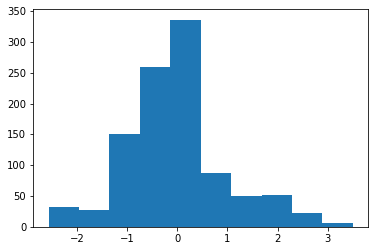

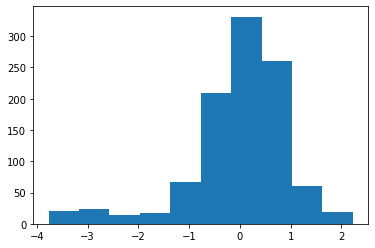

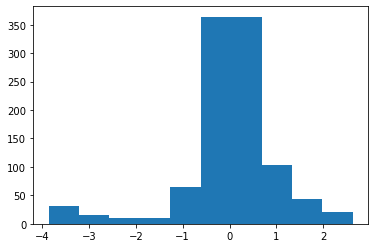

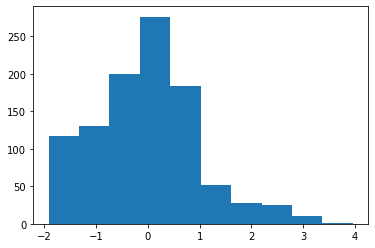

In [38]:
for i in range(10):
    plt.hist(y[:,i].numpy())
    plt.show()